In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])           #(size in 1000 square feet)
y_train = np.array([200.0, 300.0, 500.0, 600.0, 800.0])           #(price in 1000s of dollars)

In [3]:
def compute_cost(x, y, w, b): 
    
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [4]:
compute_cost(x_train,y_train,200,100)

27000.0

In [5]:
def compute_gradient(x, y, w, b): 
    
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [6]:
compute_gradient(x_train,y_train,200,100)

(760.0, 220.0)

In [7]:
import copy
import math

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [9]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 20000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.07e+05  dj_dw: -1.740e+03, dj_db: -4.800e+02   w:  1.740e+01, b: 4.80000e+00
Iteration 2000: Cost 3.00e+02  dj_dw: -1.703e-02, dj_db:  6.149e-02   w:  1.499e+02, b: 3.03631e+01
Iteration 4000: Cost 3.00e+02  dj_dw: -5.777e-04, dj_db:  2.086e-03   w:  1.500e+02, b: 3.00123e+01
Iteration 6000: Cost 3.00e+02  dj_dw: -1.959e-05, dj_db:  7.074e-05   w:  1.500e+02, b: 3.00004e+01
Iteration 8000: Cost 3.00e+02  dj_dw: -6.646e-07, dj_db:  2.399e-06   w:  1.500e+02, b: 3.00000e+01
Iteration 10000: Cost 3.00e+02  dj_dw: -2.254e-08, dj_db:  8.138e-08   w:  1.500e+02, b: 3.00000e+01
Iteration 12000: Cost 3.00e+02  dj_dw: -7.645e-10, dj_db:  2.760e-09   w:  1.500e+02, b: 3.00000e+01
Iteration 14000: Cost 3.00e+02  dj_dw: -2.679e-11, dj_db:  9.348e-11   w:  1.500e+02, b: 3.00000e+01
Iteration 16000: Cost 3.00e+02  dj_dw: -1.455e-12, dj_db:  3.070e-12   w:  1.500e+02, b: 3.00000e+01
Iteration 18000: Cost 3.00e+02  dj_dw: -1.370e-12, dj_db:  1.762e-13   w:  1.500e+02, b: 3.00000

In [10]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 180.0 Thousand dollars
1200 sqft house prediction 210.0 Thousand dollars
2000 sqft house prediction 330.0 Thousand dollars


In [11]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 200
tmp_alpha = 8.0e-3
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration    0: Cost 1.13e+05  dj_dw: -1.740e+03, dj_db: -4.800e+02   w:  1.392e+01, b: 3.84000e+00
Iteration   20: Cost 2.42e+03  dj_dw: -2.386e+02, dj_db: -6.419e+01   w:  1.289e+02, b: 3.53773e+01
Iteration   40: Cost 3.49e+02  dj_dw: -3.307e+01, dj_db: -7.310e+00   w:  1.447e+02, b: 3.94551e+01
Iteration   60: Cost 3.10e+02  dj_dw: -4.925e+00, dj_db:  4.358e-01   w:  1.469e+02, b: 3.97804e+01
Iteration   80: Cost 3.08e+02  dj_dw: -1.061e+00, dj_db:  1.458e+00   w:  1.473e+02, b: 3.95984e+01
Iteration  100: Cost 3.08e+02  dj_dw: -5.222e-01, dj_db:  1.560e+00   w:  1.474e+02, b: 3.93529e+01
Iteration  120: Cost 3.08e+02  dj_dw: -4.383e-01, dj_db:  1.538e+00   w:  1.475e+02, b: 3.91046e+01
Iteration  140: Cost 3.07e+02  dj_dw: -4.171e-01, dj_db:  1.500e+00   w:  1.475e+02, b: 3.88617e+01
Iteration  160: Cost 3.07e+02  dj_dw: -4.046e-01, dj_db:  1.460e+00   w:  1.476e+02, b: 3.86251e+01
Iteration  180: Cost 3.06e+02  dj_dw: -3.936e-01, dj_db:  1.421e+00   w:  1.477e+02, b: 3.83948e+01


In [12]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] + b_final

Text(0.5, 0, 'price in 1000s of dollars')

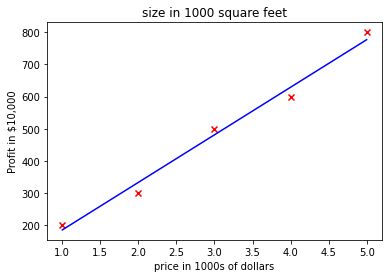

In [14]:
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title(" Linear Regression")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('price in 1000s of dollars')